C/N ratio between shallow airds bay and deep inner: TtestResult(statistic=7.298427601514278, pvalue=0.0003373519106480793, df=6.0)
C/N ratio between deep inner and shallow inner: TtestResult(statistic=-1.4872731984475063, pvalue=0.19709823679790467, df=5.0)


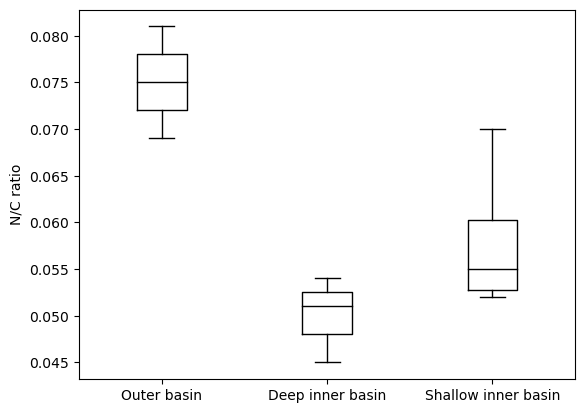

In [1]:
# Plotting how the N/C ratio changes between the outerbasin, deep inner basin, and shallow inner basin

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

sab= np.loadtxt("shallow_airds_bay.csv",
                 delimiter=",")

di= np.loadtxt("deep_inner.csv",
                 delimiter=",")

si= np.loadtxt("shallow_inner.csv",
                 delimiter=",")

sab_di_si=[sab,di,si]
bp2=plt.boxplot(sab_di_si)
plt.setp(bp2['medians'], color='black')
plt.xticks([1,2,3],['Outer basin','Deep inner basin','Shallow inner basin'])
plt.ylabel("N/C ratio")

plt.savefig('N_C.jpeg')

# Run a T-test

import scipy.stats as stats
b=stats.ttest_ind(sab,di)
print("C/N ratio between shallow airds bay and deep inner:",b)
c=stats.ttest_ind(di,si)
print("C/N ratio between deep inner and shallow inner:",c)

# Because there is a difference between basins, but no difference within a basin
# It is likely that the difference in N/C ratio is dictated by the sediment deposition
# and controlled by the lack of sediment exchange across the sill

Mn/Al conc. between shallow airds bay and deep inner: TtestResult(statistic=2.0747830262698526, pvalue=0.08333409993753758, df=6.0)
Mn/Al conc. between deep inner and shallow inner: TtestResult(statistic=-1.4387115624665896, pvalue=0.20975898580454447, df=5.0)


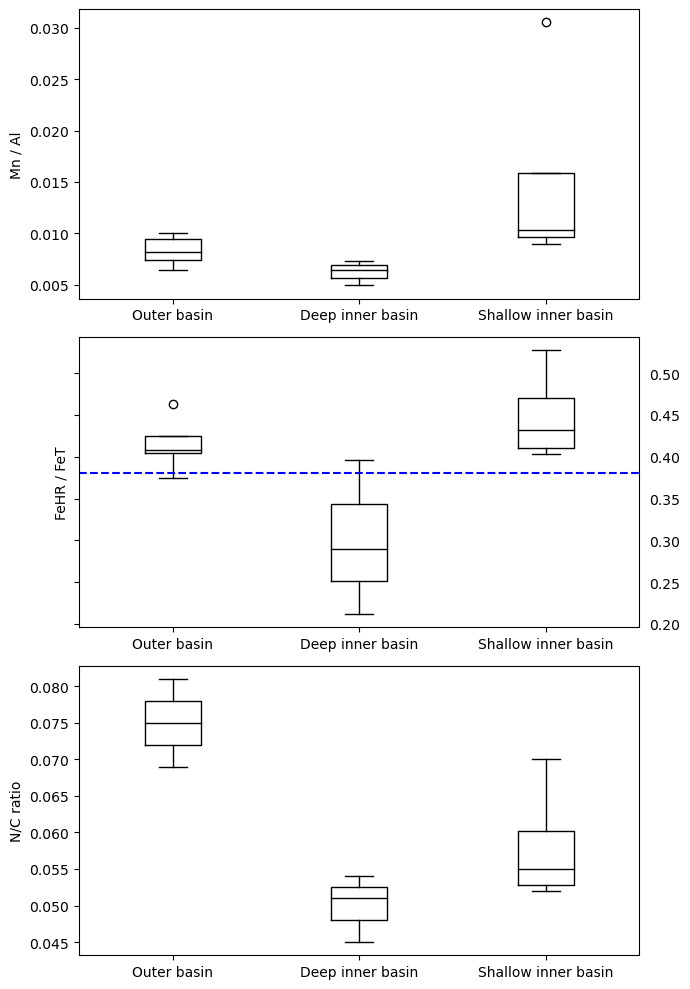

In [10]:
# Plotting Mn/Al, FeHR/FeT, and N/C changes across the three basins for comparison
    # Mn/Al and FeHR/FeT are both indicators for bottom water hypoxia
    # N/C ratio is high for marine sediments and low for refractory terrestrial sediments
# From the plots, deep oxic conditions are correlated with high terrestrial sediments input,
    # This supports the argument that terrestrial sediments slow bacterial consumption of oxygen, 
    # thus alleviating bottom water hypoxia
    
plt.figure(figsize=(7,10))

plt.subplot(3,1,1)

MnAldata=np.loadtxt("MnAl.csv",delimiter=",")


arr1=MnAldata[0:4]
arr2=MnAldata[4:7]
arr3=MnAldata[7:13]
Mnarr=[arr3,arr2,arr1]
bp3=plt.boxplot(Mnarr)
plt.setp(bp3['medians'], color='black')
plt.xticks([1,2,3],['Outer basin','Deep inner basin','Shallow inner basin'])
plt.ylabel("Mn / Al")

plt.subplot(3,1,2)

Fedata=np.loadtxt("Fe.csv",delimiter=",")
arr6=Fedata[0:4]
arr7=Fedata[4:7]
arr8=Fedata[7:13]
Fearr=[arr8,arr7,arr6]
bp5=plt.boxplot(Fearr)
plt.setp(bp5['medians'], color='black')
plt.xticks([1,2,3],['Outer basin','Deep inner basin','Shallow inner basin'])
plt.ylabel("FeHR / FeT")
plt.axhline(y = 0.38, color = 'blue', linestyle = '--')
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)

#To print t-test results within Fe data, run following code

"""
print(stats.ttest_ind(arr8,arr7))
print(stats.ttest_ind(arr7,arr6))
"""

plt.subplot(3,1,3)

sab= np.loadtxt("shallow_airds_bay.csv",
                 delimiter=",")

di= np.loadtxt("deep_inner.csv",
                 delimiter=",")

si= np.loadtxt("shallow_inner.csv",
                 delimiter=",")

sab_di_si=[sab,di,si]
bp2=plt.boxplot(sab_di_si)
plt.setp(bp2['medians'], color='black')
plt.xticks([1,2,3],['Outer basin','Deep inner basin','Shallow inner basin'])
plt.ylabel("N/C ratio")

#To print the box plot statistics, run following code

"""
#MnAl
for key in bp3:
   print(f'{key}: {[item.get_ydata() for item in bp3[key]]}\n')

#Fe
for key in bp5:
    print(f'{key}: {[item.get_ydata() for item in bp5[key]]}\n')

#N/C
for key in bp2:
    print(f'{key}: {[item.get_ydata() for item in bp2[key]]}\n')
    
"""
    
plt.tight_layout()
d=stats.ttest_ind(arr3,arr2)
print("Mn/Al conc. between shallow airds bay and deep inner:",d)
e=stats.ttest_ind(arr2,arr1)
print("Mn/Al conc. between deep inner and shallow inner:",e)

plt.savefig('combined.png')


R coefficient= 0.5978817179892091 p-value= 0.04004443624925196


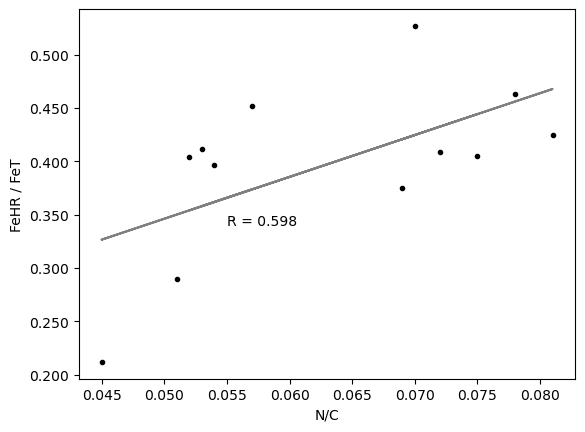

In [12]:
# Correlation between FeHR/FeT and N/C

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

a=[0.052,0.070,0.053,0.057,0.054,0.051,0.045,0.081,0.078,0.069,0.072,0.075]
b=[0.404,0.527,0.412,0.452,0.397,0.290,0.212,0.425,0.463,0.375,0.409,0.405]
fig = plt.figure()
ax = fig.add_subplot()
N_C=np.array(a)
FeHR=np.array(b)
ax.plot(N_C,FeHR,'.',color="black")
h,k = np.polyfit(N_C,FeHR, 1)
plt.plot(N_C,h*N_C+k,color="grey",label='Regression')
plt.xlabel("N/C")
plt.ylabel("FeHR / FeT")
plt.text(0.055,0.34,"R = 0.598")
ax.xaxis.set_major_formatter(FormatStrFormatter('%1.3f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%1.3f'))

from scipy import stats
r,p=stats.pearsonr(N_C, FeHR)
print("R coefficient=",r,"p-value=",p)

plt.savefig('FeNC.png')


R coefficient= 0.9875847632466814 p-value= 2.2751908570725904e-09


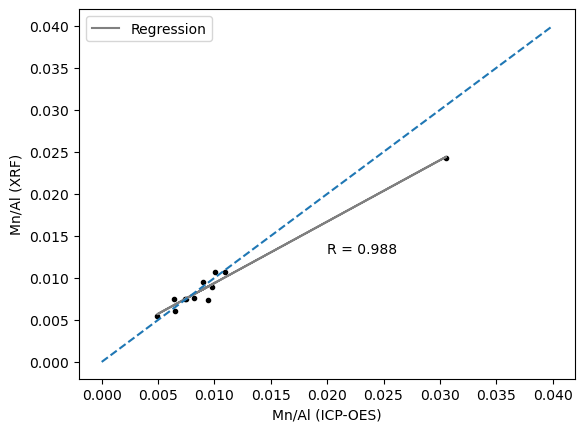

In [13]:
#Here, i will try and plot w vs x (Mn/Al from ICP-OES against XRF)

w,x,y,z=np.loadtxt('validation.csv',delimiter=",",usecols=(0,1,2,3),unpack=True,skiprows=2)
plt.plot(w,x,".",color="black")
h,k = np.polyfit(w, x, 1)
plt.plot(w, h*w+k,color="grey",label='Regression')
plt.xlabel("Mn/Al (ICP-OES)")
plt.ylabel("Mn/Al (XRF)")
from scipy import stats
r,p=stats.pearsonr(w, x)
print("R coefficient=",r,"p-value=",p)

#plotting 1:1 line
hi=[0,0.02,0.04]
hi2=[0,0.02,0.04]
plt.plot(hi,hi2,"--")

plt.text(0.020,0.013,"R = 0.988")

plt.legend()
plt.savefig('MnAlxrf_icp.png')

R coefficient= 0.6924038514008835 p-value= 0.01257564237289409


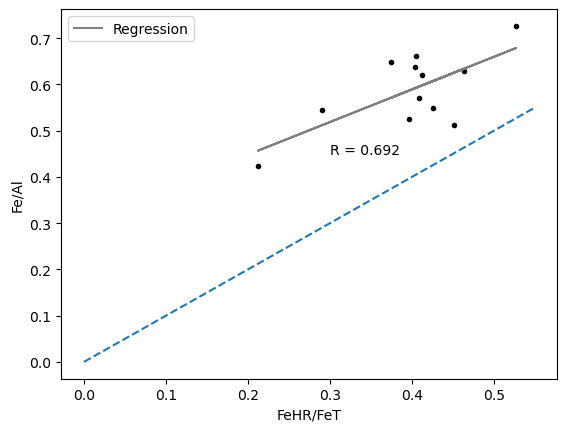

In [14]:
#I will also plot y against z (FeH/Fe from leached sediments and Fe/Al bulk sediments)

plt.plot(y,z,".",color="black")
h1,k1 = np.polyfit(y, z, 1)
plt.plot(y, h1*y+k1,color="grey",label='Regression')
plt.xlabel("FeHR/FeT")
plt.ylabel("Fe/Al")
from scipy import stats
r1,p1=stats.pearsonr(y, z)
print("R coefficient=",r1,"p-value=",p1)

#plotting 1:1 line
hi=[0,0.1,0.2,0.3,0.4,0.55]
hi2=[0,0.1,0.2,0.3,0.4,0.55]
plt.plot(hi,hi2,"--")

plt.text(0.3,0.45,"R = 0.692")

plt.legend()
plt.savefig('FeAxrf_icp.png')

#Iron:Al ratio depends on the number of iron bearing minerals there are. As this may vary, the ratio could differ, causing the larger variation seen here.

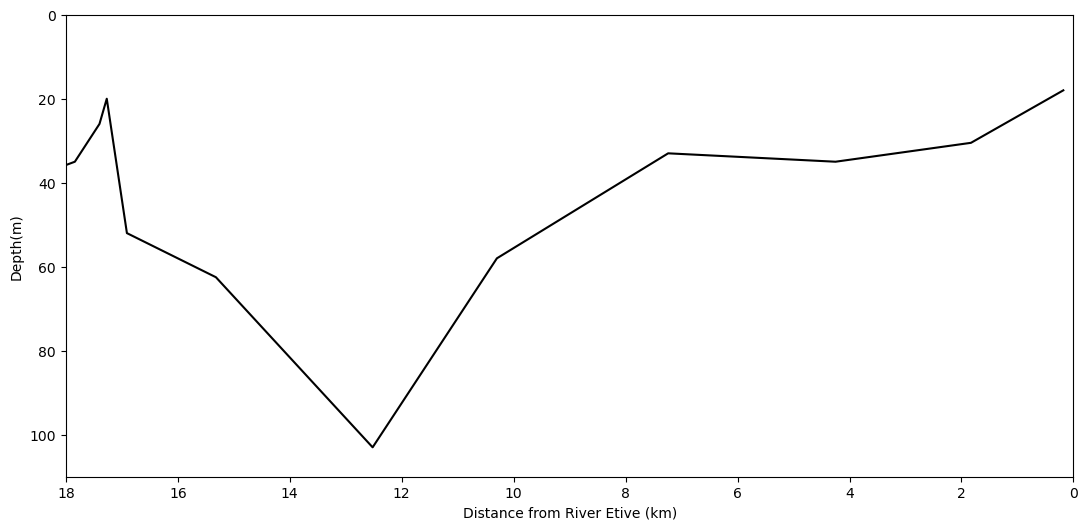

In [15]:
# Plotting the bathymetry of loch etive

import scipy as scipy

distance,depth=np.loadtxt('depth.txt',usecols=(0,1),unpack=True)
plt.figure(figsize=(13,6))
plt.plot(distance,depth,"-",color="black")
plt.xlim(18,0)
plt.ylim(110,0)
plt.xlabel("Distance from River Etive (km)")
plt.ylabel("Depth(m)")

plt.savefig('depth.jpeg')



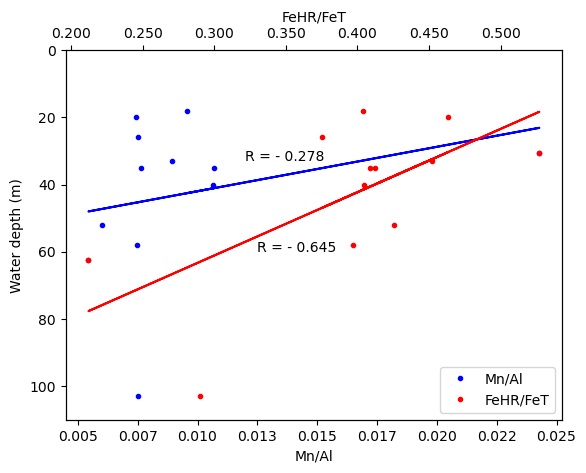

In [16]:
#Combining the two redox indicators against depth in one graph 

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

fig = plt.figure()
ax = fig.add_subplot()

lns1=ax.plot(x,depth,".",color="blue",label='Mn/Al')
h3,k3 = np.polyfit(x, depth, 1)
plt.plot(x, h3*x+k3,color="blue")
plt.text(0.0120,33,"R = - 0.278")

ax2 = ax.twiny()

lns2=ax2.plot(y,depth,".",color="red",label='FeHR/FeT')
h4,k4 = np.polyfit(y, depth, 1)
plt.plot(y, h4*y+k4,color="red")
plt.text(0.33,60,"R = - 0.645")

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc="lower right")

ax.set_xlabel("Mn/Al")
ax.set_ylabel("Water depth (m)")
ax.set_ylim(110,0)
ax2.set_xlabel("FeHR/FeT")
ax.xaxis.set_major_formatter(FormatStrFormatter('%1.3f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%1.3f'))
plt.savefig('combineddepth.png')


0.6551154135544894 0.02076151000404853


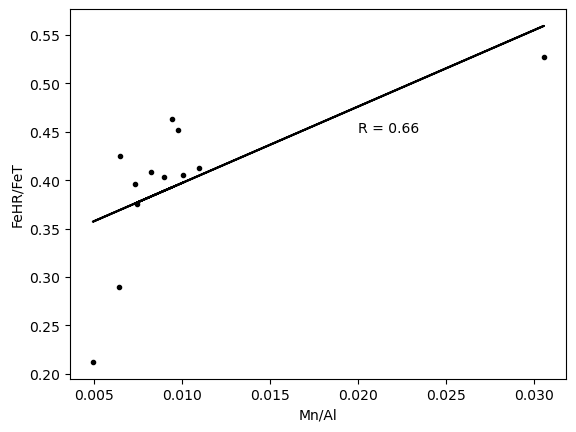

In [17]:
# Checking if the redox indicators agree with each other

plt.text(0.020,0.45,"R = 0.66")
plt.plot(w,y,'.',color="black")
plt.xlabel("Mn/Al")
plt.ylabel("FeHR/FeT")
h5,k5 = np.polyfit(w,y,1)
plt.plot(w, h5*w+k5,color="black")
r,p=stats.pearsonr(w,y)
print(r,p)

